In [1]:
import numpy as np
import pandas as pd
import hypertools as hyp 

import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.colors import ListedColormap
from sklearn.neighbors.kde import KernelDensity
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error, mean_squared_error

%matplotlib inline

In [2]:
data = pd.read_csv('YearPredictionMSD.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [3]:
data.columns = ["year"] + ["timb_avg" + str(i) for i in range(12)] + ["timb_cov" + str(i) for i in range(78)]
data.head()

,year,timb_avg0,timb_avg1,timb_avg2,timb_avg3,timb_avg4,timb_avg5,timb_avg6,timb_avg7,timb_avg8,...,timb_cov68,timb_cov69,timb_cov70,timb_cov71,timb_cov72,timb_cov73,timb_cov74,timb_cov75,timb_cov76,timb_cov77
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [4]:
pca = PCA(n_components=0.99, svd_solver='full')

X = data.drop('year', axis=1)
Y = data['year']

X = pca.fit_transform(X)
print(X.shape)

(515345, 45)


In [5]:
X = pd.DataFrame(data=X[:,:])
Y = pd.DataFrame({'year': Y})

In [6]:
data = pd.concat([Y, X], axis=1)

In [7]:
data = data[data['year'] > 1964]
data = data[data['year'] < 2011]
data.head()

def bootstrap(data, num_to_extract=1000):
    # This function will be applied on each group of instances of the same
    # class in `data`.
    def sampleClass(classgroup):
        cls = classgroup['year'].iloc[0]
        nDesired = num_to_extract
        nRows = len(classgroup)

        nSamples = min(nRows, nDesired)
        return classgroup.sample(nSamples)

    samples = data.groupby('year').apply(sampleClass)
    
    return samples

data = bootstrap(data)

In [8]:
X = data.drop('year', axis=1)
Y = data['year']

X_norm = normalize(X)


In [9]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10, verbose=2)
kmeans.fit(X)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 240631579672.0
start iteration
done sorting
end inner loop
Iteration 1, inertia 227074809782.0
start iteration
done sorting
end inner loop
Iteration 2, inertia 224956072911.0
start iteration
done sorting
end inner loop
Iteration 3, inertia 224424371214.0
start iteration
done sorting
end inner loop
Iteration 4, inertia 224241745768.0
start iteration
done sorting
end inner loop
Iteration 5, inertia 224178798320.0
start iteration
done sorting
end inner loop
Iteration 6, inertia 224152938543.0
start iteration
done sorting
end inner loop
Iteration 7, inertia 224141768425.0
start iteration
done sorting
end inner loop
Iteration 8, inertia 224136227346.0
start iteration
done sorting
end inner loop
Iteration 9, inertia 224133595808.0
start iteration
done sorting
end inner loop
Iteration 10, inertia 224132336223.0
start iteration
done sorting
end inner loop
Iteration 11, inertia 224131534615.0
start iteratio

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=2)

In [10]:
kmeans.labels_

array([2, 2, 2, ..., 1, 0, 0], dtype=int32)

In [11]:
labels = pd.DataFrame({'cluster': kmeans.labels_})

In [12]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46000 entries, 0 to 45999
Data columns (total 1 columns):
cluster    46000 non-null int32
dtypes: int32(1)
memory usage: 179.8 KB


In [13]:
Y = [int(i) for i in Y]
Y_pd = pd.DataFrame({'year': Y})
Y_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46000 entries, 0 to 45999
Data columns (total 1 columns):
year    46000 non-null int64
dtypes: int64(1)
memory usage: 359.4 KB


In [14]:
result = pd.concat([Y_pd, labels], axis=1)

In [15]:
calc = result.groupby(['cluster'])
calc_result = calc.agg(['mean', 'count', 'min', 'max'])
pd.set_option('display.max_rows', len(calc_result))
print(calc_result)
pd.reset_option('display.max_rows')

                year                   
                mean  count   min   max
cluster                                
0        1987.097010  25719  1965  2010
1        1991.776390   3524  1965  2010
2        1987.219192  16757  1965  2010


In [16]:
sns.set(color_codes=True)

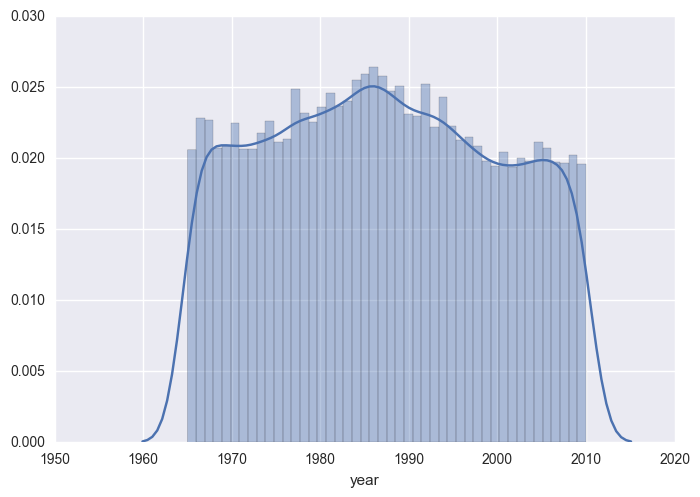

In [20]:
sns.distplot(calc.get_group(0)['year'], bins=len(set(calc.get_group(1)['year'])))

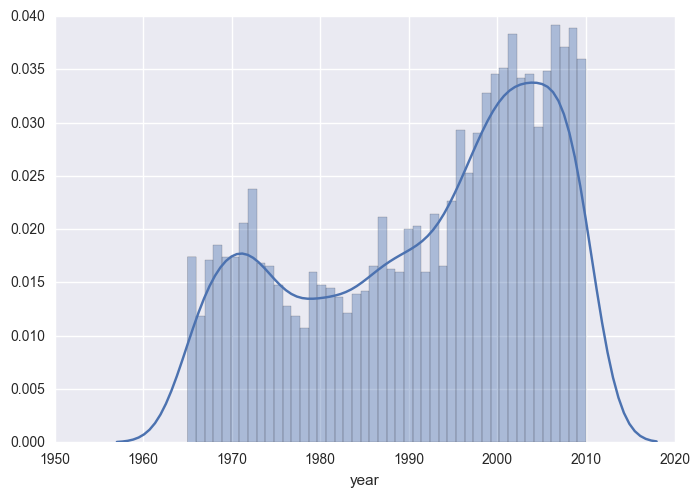

In [19]:
sns.distplot(calc.get_group(1)['year'], bins=len(set(calc.get_group(1)['year'])))

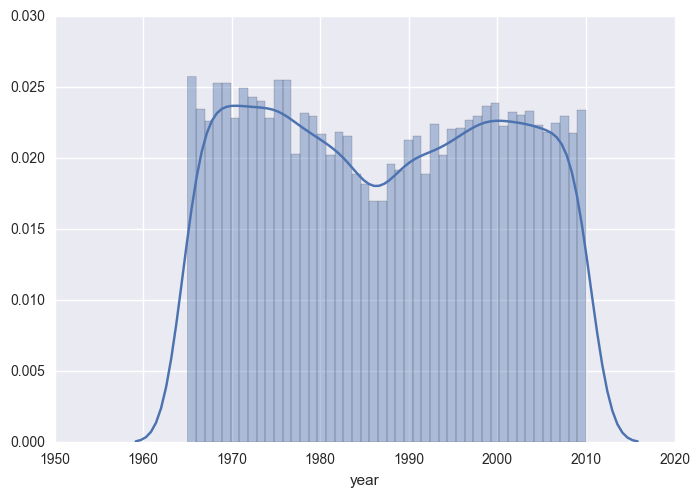

In [21]:
sns.distplot(calc.get_group(2)['year'], bins=len(set(calc.get_group(1)['year'])))

(1000, 1)
(16757, 1)
[[ 1993.09309309]]
[[ 1994.21421421]]
[[ 1977.25725726]
 [ 1995.68568569]]


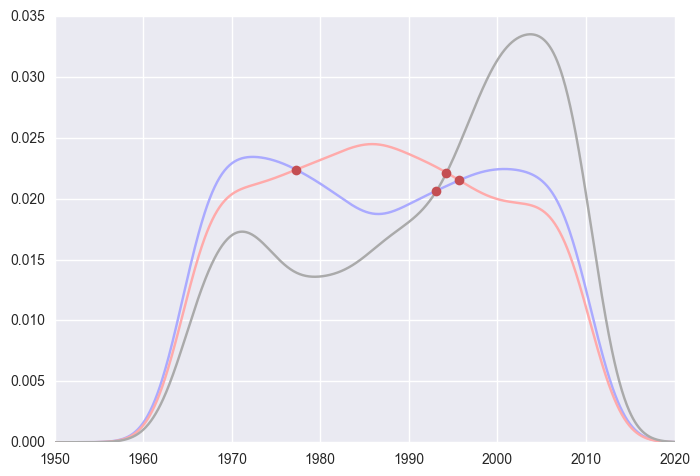

In [24]:
fig, ax = plt.subplots(1, 1)

X_plot = np.linspace(1950, 2020, 1000)[:, np.newaxis]
print(X_plot.shape)
print(calc.get_group(2)['year'][:, np.newaxis].shape)

kde = KernelDensity(kernel='gaussian', bandwidth=3).fit(calc.get_group(2)['year'][:, np.newaxis])
log_dens = kde.score_samples(X_plot)

graph_1 = np.exp(log_dens)

ax.plot(X_plot, graph_1, c='#AAAAFF')



X_plot = np.linspace(1950, 2020, 1000)[:, np.newaxis]

kde = KernelDensity(kernel='gaussian', bandwidth=3).fit(calc.get_group(0)['year'][:, np.newaxis])
log_dens = kde.score_samples(X_plot)

graph_2 = np.exp(log_dens)
ax.plot(X_plot, graph_2, c='#FFAAAA')



X_plot = np.linspace(1950, 2020, 1000)[:, np.newaxis]

kde = KernelDensity(kernel='gaussian', bandwidth=3).fit(calc.get_group(1)['year'][:, np.newaxis])
log_dens = kde.score_samples(X_plot)

graph_3 = np.exp(log_dens)
ax.plot(X_plot, graph_3, c='#AAAAAA')




idx = np.argwhere(np.diff(np.sign(graph_2 - graph_3)) != 0).reshape(-1) + 0
print(X_plot[idx])
plt.plot(X_plot[idx], graph_3[idx], 'ro')
idx = np.argwhere(np.diff(np.sign(graph_1 - graph_2)) != 0).reshape(-1) + 0
print(X_plot[idx])
plt.plot(X_plot[idx], graph_2[idx], 'ro')